<a href="https://colab.research.google.com/github/hadil1999-creator/Summer-Internship-at-Innov-com/blob/main/INNOV'COM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Face Emotional Recongnition:
3 steps:a) face detection, b) facial expression detection, c) expression classification to an emotional state

In [ ]:
import numpy as np
import tensorflow as tf
import os
import PIL
import PIL.Image
import pandas as pd

In [ ]:
print(tf.__version__)

2.8.2


In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

1/ Face Detection


1.1 Downloading the dataset for Face detection

/This dataset is only to test the efficacity of functions and to chnage parameteres...else we will use the camera for capturing images or real time videos/

In [ ]:
!kaggle datasets download -d stoicstatic/face-recognition-dataset

In [ ]:
!unzip face-recognition-dataset.zip

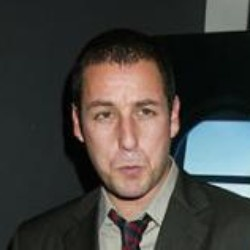

In [ ]:
from IPython.display import Image 
pil_img = Image(filename='/content/Face Data/Face Dataset/10/0.jpg')
display(pil_img)

1.2 Face Detection with images in database(for exemple)



In [ ]:
import cv2
import sys

In [ ]:
cv2.__version__

'4.6.0'

*Haarcascade classifier already built in opencv*

In [ ]:
imagePath = sys.argv[1]
cascPath = "haarcascade_frontalface_default.xml"

*We can add specificities like eyes detection or anyother feature needed to future use*

In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + cascPath)
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')


In [ ]:
image = cv2.imread('/content/Face Data/Face Dataset/10/0.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


In [ ]:
faces = face_cascade.detectMultiScale(gray, 1.1, 2)

In [ ]:
for (x,y,w,h) in faces:
    cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = image[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)


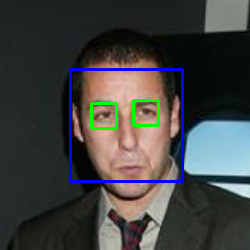

In [ ]:
from google.colab.patches import cv2_imshow
# Display the output
cv2_imshow(image)


*Having all the code in one function*

In [ ]:
def detect(path):
  image = cv2.imread(path)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray, 1.1, 3)
  for (x,y,w,h) in faces:
    cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = image[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
  from google.colab.patches import cv2_imshow
  cv2_imshow(image)



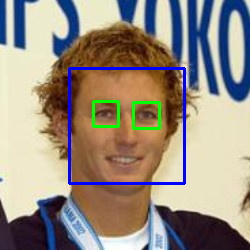

In [ ]:
detect('/content/Face Data/Face Dataset/0/1.jpg')

1.3 Face Detection through real time images




In [ ]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

*Helper functions of JS*

*convert images from javascript to opencv*

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

*Use code within Google Colab's **Code Snippets** that has a variety of useful code functions to perform various tasks.*

*We will be using the code snippet for **Camera Capture** to utilize your computer's webcam.*

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
#photo.jpg is the variable which will store the captured image
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data) 
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray,1.1,3)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
      cv2.putText(img, 'Face', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
  # save image
  cv2.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


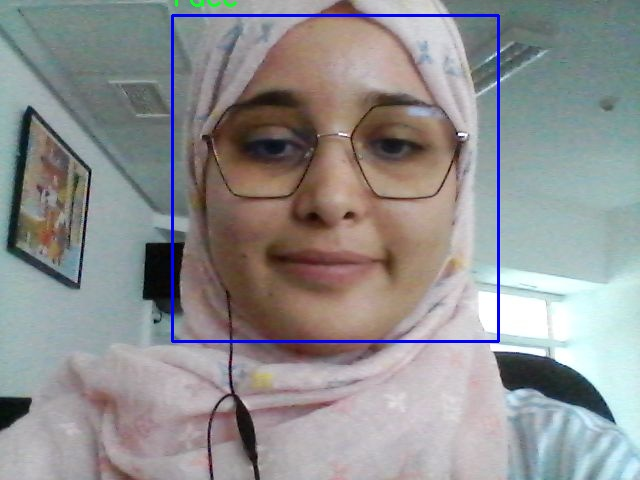

In [ ]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))


except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))
#it will give us the hight and width 
#it will save the capture into photo.jpg found in the left


1.4 Face Detection through real time videos

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8) #the different thing between image capturing and video capturing

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray,1.1,3)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)
      cv2.putText(bbox_array, 'Face Detection', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes


<IPython.core.display.Javascript object>

Data Augmenetation

In [ ]:
shape = [256, 256, 256]
tf.compat.v1.disable_eager_execution()
x = tf.compat.v1.placeholder( shape = shape, dtype = tf.float32)
flip_2 = tf.image.flip_up_down(x)
flip_3 = tf.image.flip_left_right(x)
flip_4 = tf.image.random_flip_up_down(x)
flip_5 = tf.image.random_flip_left_right(x)

2/ Face Recongition

2.1 Downloading the Dataset

In [ ]:
!kaggle datasets download -d jessicali9530/lfw-dataset

 92% 104M/112M [00:00<00:00, 122MB/s] 
100% 112M/112M [00:00<00:00, 147MB/s]


In [ ]:
!unzip lfw-dataset.zip

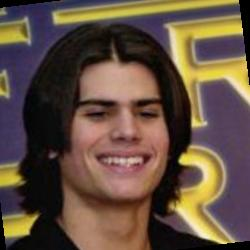

In [ ]:
from IPython.display import Image 
pil_img = Image(filename='/content/lfw-deepfunneled/lfw-deepfunneled/AJ_Lamas/AJ_Lamas_0001.jpg')
display(pil_img)


*lfwallnames.csv: Contains all names of each face in the dataset along with number of images each face has.*

In [ ]:
!pip install split-folders


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders
splitfolders.ratio('/content/lfw-deepfunneled/lfw-deepfunneled', output="output", seed=1337, ratio=(0.7, 0.1,0.2)) 

Copying files: 13233 files [00:04, 3085.43 files/s]


In [ ]:
import cv2
im = cv2.imread('/content/lfw-deepfunneled/lfw-deepfunneled/AJ_Lamas/AJ_Lamas_0001.jpg')
print(type(im))
print(im.shape)
print(type(im.shape))


<class 'numpy.ndarray'>
(250, 250, 3)
<class 'tuple'>


In [ ]:
!rm -rf output

*Split data into an output directory*

In [ ]:
from keras.preprocessing import image
image_size = (48,48)
batch_size = 64
train1 = tf.keras.preprocessing.image_dataset_from_directory('/content/output/train', seed = 1000,image_size=image_size, batch_size = batch_size,color_mode='rgb')

Found 5727 files belonging to 5749 classes.


In [ ]:
test1 = tf.keras.preprocessing.image_dataset_from_directory('/content/output/test', seed = 1000,image_size=image_size,color_mode='rgb')

Found 7129 files belonging to 5749 classes.


In [ ]:
validation1 = tf.keras.preprocessing.image_dataset_from_directory('/content/output/val', seed = 1000,image_size=image_size,color_mode='rgb')

Found 377 files belonging to 5749 classes.


Build Models

In [ ]:
import os
from tensorflow import keras
from keras.models import Sequential
import keras
from keras import layers
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers import Convolution2D, MaxPooling2D,AveragePooling2D,Dropout

*Checking the size of the dataset images*

In [ ]:
model1 = keras.Sequential()

model1.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,3),padding='same'))
model1.add(layers.MaxPooling2D(2,2))
model1.add(layers.Dropout(0.1, noise_shape=None, seed=None))


model1.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model1.add(layers.MaxPooling2D(2,2))
model1.add(layers.Dropout(0.1, noise_shape=None, seed=None))

model1.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(48,48,3),padding='same'))
model1.add(layers.MaxPooling2D(2,2))
model1.add(layers.Dropout(0.1, noise_shape=None, seed=None))


model1.add(layers.Flatten())
model1.add(layers.Dense(units=120, activation='relu'))
model1.add(layers.Dropout(0.1, noise_shape=None, seed=None))
model1.add(layers.Dense(units=5749, activation = 'softmax'))

In [ ]:
for layer in model1.layers:
    print(layer.output_shape)

(None, 48, 48, 32)
(None, 24, 24, 32)
(None, 24, 24, 32)
(None, 22, 22, 64)
(None, 11, 11, 64)
(None, 11, 11, 64)
(None, 11, 11, 64)
(None, 5, 5, 64)
(None, 5, 5, 64)
(None, 1600)
(None, 120)
(None, 120)
(None, 5749)


In [ ]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 11, 11, 64)       

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model1.compile(optimizer=opt,loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
es = tf.keras.callbacks.EarlyStopping(monitor='accuracy', verbose=1, patience=1,mode="max")


In [ ]:
model1_fit = model1.fit(train1, epochs=15)

Epoch 1/15
90/90 [==============================] - 5s 51ms/step - loss: 6.5944 - accuracy: 0.0648
Epoch 2/15
90/90 [==============================] - 4s 40ms/step - loss: 6.5888 - accuracy: 0.0648
Epoch 3/15
90/90 [==============================] - 3s 31ms/step - loss: 6.5857 - accuracy: 0.0648
Epoch 4/15
49/90 [===============>..............] - ETA: 1s - loss: 6.5733 - accuracy: 0.0631

KeyboardInterrupt: ignored

In [ ]:
model1_evaluate = model1.evaluate(validation1)

12/12 [==============================] - 0s 8ms/step - loss: 4.8168 - accuracy: 0.1512


Text(0.5, 0, 'epoch')

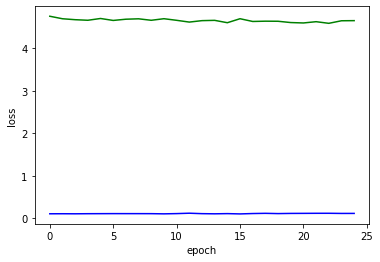

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model1_fit.history['accuracy'],color="blue")
plt.plot(model1_fit.history['loss'], color = "green")
plt.ylabel('accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')

In [ ]:
prediction1=model1.predict(test1)

In [ ]:
df1 = pd.DataFrame(prediction1)
df1['predicted_person']= np.argmax(prediction1, axis=-1)
df1

Pretrained models

*CNN Model*

*LeNet5 Architecture*

*7 layers without considering the input layer*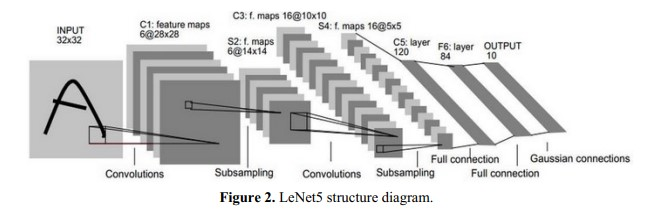

In [ ]:
from keras.preprocessing import image
image_size = (32,32)
batch_size = 64
train1 = tf.keras.preprocessing.image_dataset_from_directory('/content/output/train', seed = 1000,image_size=image_size, batch_size = batch_size,color_mode='rgb')

Found 5727 files belonging to 5749 classes.


In [ ]:
validation1 = tf.keras.preprocessing.image_dataset_from_directory('/content/output/val', seed = 1000,image_size=image_size, batch_size = batch_size,color_mode='rgb')

Found 377 files belonging to 5749 classes.


In [ ]:
test1 = tf.keras.preprocessing.image_dataset_from_directory('/content/output/test', seed = 1000,image_size=image_size, batch_size = batch_size,color_mode='rgb')

Found 7129 files belonging to 5749 classes.


In [ ]:
model2 = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=(32,32,3), padding='same'), 
    keras.layers.AveragePooling2D(), 
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), 
    keras.layers.AveragePooling2D(),
    keras.layers.Conv2D(120, kernel_size=5, strides=1, activation='tanh', padding='valid'),
    keras.layers.Flatten(), 
    keras.layers.Dense(84, activation='tanh'), 
    keras.layers.Dense(5749, activation='softmax') 
])

In [ ]:
opt = tf.keras.optimizers.Adam()
model2.compile(optimizer=opt, loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [ ]:
model2.fit(train,epochs=5)

Epoch 1/5
90/90 [==============================] - 3s 27ms/step - loss: 6.9897 - accuracy: 0.0648
Epoch 2/5
90/90 [==============================] - 3s 27ms/step - loss: 6.7238 - accuracy: 0.0648
Epoch 3/5
90/90 [==============================] - 3s 28ms/step - loss: 6.6564 - accuracy: 0.0648
Epoch 4/5
90/90 [==============================] - 3s 27ms/step - loss: 6.6384 - accuracy: 0.0648
Epoch 5/5
90/90 [==============================] - 3s 28ms/step - loss: 6.6423 - accuracy: 0.0648


In [ ]:
model2_evaluate = model2.evaluate(test1)

112/112 [==============================] - 4s 27ms/step - loss: 10.6292 - accuracy: 0.0149


In [ ]:
prediction2=model2.predict(test)
prediction2.shape

(7129, 5749)

In [ ]:
df2 = pd.DataFrame(prediction2)
df2['predicted_person']= np.argmax(prediction2, axis=-1)
df2


,0,1,2,3,4,5,6,7,8,9,...,5740,5741,5742,5743,5744,5745,5746,5747,5748,predicted_person
0,0.000123,0.000098,0.000146,0.000120,0.000144,0.000149,0.000107,0.000139,0.000125,0.000127,...,0.000149,0.000135,0.000147,0.000184,0.000126,0.000122,0.000122,0.000166,0.000118,1871
1,0.000123,0.000098,0.000146,0.000120,0.000144,0.000149,0.000107,0.000139,0.000125,0.000127,...,0.000149,0.000135,0.000147,0.000184,0.000126,0.000122,0.000122,0.000166,0.000118,1871
2,0.000123,0.000098,0.000146,0.000120,0.000144,0.000149,0.000107,0.000139,0.000125,0.000127,...,0.000149,0.000135,0.000147,0.000184,0.000126,0.000122,0.000122,0.000166,0.000118,1871
3,0.000124,0.000098,0.000146,0.000121,0.000144,0.000149,0.000108,0.000139,0.000125,0.000127,...,0.000149,0.000135,0.000147,0.000185,0.000126,0.000122,0.000123,0.000167,0.000118,1871
4,0.000123,0.000098,0.000146,0.000120,0.000144,0.000149,0.000107,0.000139,0.000125,0.000127,...,0.000149,0.000135,0.000147,0.000184,0.000126,0.000122,0.000122,0.000166,0.000118,1871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7124,0.000123,0.000098,0.000146,0.000120,0.000143,0.000149,0.000107,0.000139,0.000125,0.000127,...,0.000149,0.000135,0.000147,0.000184,0.000126,0.000122,0.000122,0.000166,0.000118,1871
7125,0.000123,0.000098,0.000146,0.000120,0.000144,0.000149,0.000107,0.000139,0.000125,0.000127,...,0.000149,0.000135,0.000147,0.000184,0.000126,0.000122,0.000122,0.000166,0.000118,1871
7126,0.000123,0.000098,0.000146,0.000120,0.000144,0.000149,0.000107,0.000139,0.000125,0.000127,...,0.000149,0.000135,0.000147,0.000184,0.000126,0.000122,0.000122,0.000166,0.000118,1871
7127,0.000123,0.000098,0.000146,0.000120,0.000144,0.000149,0.000107,0.000139,0.000125,0.000127,...,0.000149,0.000135,0.000147,0.000184,0.000126,0.000122,0.000122,0.000166,0.000118,1871


3/Emotion Recognition 

3.1 Downloading the Dataset from kaggle

In [ ]:
! kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset

 94% 113M/121M [00:00<00:00, 107MB/s] 
100% 121M/121M [00:01<00:00, 122MB/s]


In [ ]:
!unzip face-expression-recognition-dataset.zip


In [ ]:
!rm -rf images/images

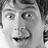

(48, 48, 3)

In [ ]:
from IPython.display import Image 
pil_img = Image(filename='images/validation/surprise/993.jpg')
display(pil_img)
import cv2
img = cv2.imread('images/validation/surprise/993.jpg')
img.shape
#resized_image = tf.image.resize(img, (48, 48))
#resized_image.shape



In [ ]:
from keras.preprocessing import image
image_size = (48,48)
batch_size = 32
train_data = tf.keras.preprocessing.image_dataset_from_directory('images/train', seed = 1000,batch_size = batch_size, image_size=image_size,color_mode='rgb')


Found 28821 files belonging to 7 classes.


In [ ]:
test_data = tf.keras.preprocessing.image_dataset_from_directory('images/validation', seed = 1000,image_size=image_size,color_mode='rgb')

Found 7066 files belonging to 7 classes.


*Visualising the data*

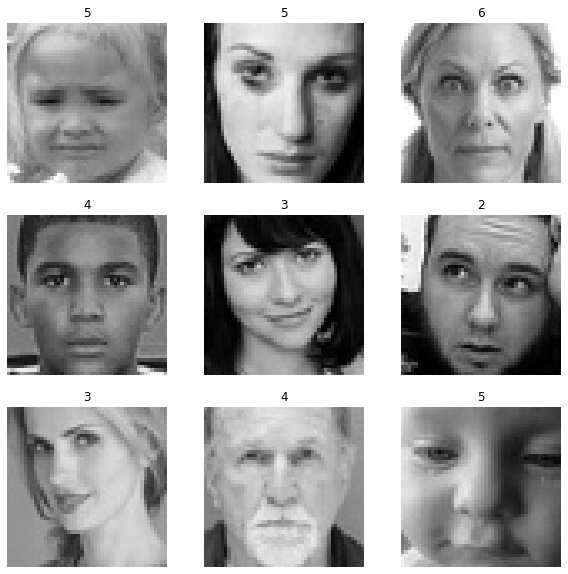

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for images, labels in train_data.take(1):
  for i in range(9):
     ax = plt.subplot(3,3, i+1)
     plt.imshow(images[i].numpy().astype("uint8"))
     plt.title(int(labels[i]))
     plt.axis("off")

3.2 Defining the classes

*Giving every class a numerical*

In [ ]:
classes = ['angry','disgust','fear','happy','neutral','sad','surprise']
class_to_index = dict((c,i) for i, c in enumerate(classes))
class_to_index

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

*Case studying*

In [ ]:
switcher={
    0: 'anger',
    1 : 'disgust',
    2: 'fear',
    3:'happy',
    4:'neutral',
    5:'sad',
    6:'surprise',
    
  }
def index_to_class(n):
  return(switcher.get(n))

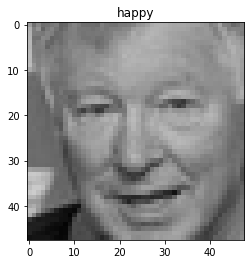

In [ ]:
img=[]
lab=[]
for images, labels in train_data.take(1):
  for i in range(len(images)):
    img.append(images[i].numpy().astype("uint8"))
    lab.append(index_to_class((int(labels[i]))))
    plt.imshow(img[i])
    plt.title(lab[i])
    #print(img[i].shape)

3.3 Build the Model

In [ ]:
import keras.api._v2.keras as keras 
import cv2
import os
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.utils import conv_utils
from tensorflow.python.keras.optimizers import *
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D

In [ ]:
from keras import layers, models
model = models.Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(48,48,3)))
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(7,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 50, 50, 3)        0         
 2D)                                                             
                                                                 
 conv2d_114 (Conv2D)         (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_60 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_115 (Conv2D)         (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_61 (MaxPoolin  (None, 11, 11, 64)       0         
 g2D)                                                            
                                                     

*print out a graphic representation of the model*

In [ ]:
print (tf.keras.utils.plot_model)

<function plot_model at 0x7f6642e9bef0>


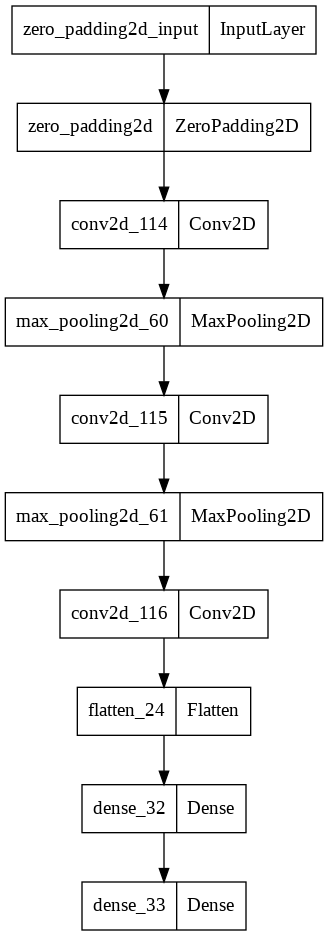

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False
)

In [ ]:
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 48, 48, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
test_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 48, 48, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor='accuracy', verbose=1, patience=1,mode="max")
model_fit = model.fit(train_data ,epochs=20)  

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


901/901 [==============================] - 25s 27ms/step - loss: 1.9384 - accuracy: 0.2952
Epoch 2/20
901/901 [==============================] - 24s 27ms/step - loss: 1.5595 - accuracy: 0.3976
Epoch 3/20
901/901 [==============================] - 19s 21ms/step - loss: 1.4472 - accuracy: 0.4359
Epoch 4/20
901/901 [==============================] - 25s 28ms/step - loss: 1.3709 - accuracy: 0.4706
Epoch 5/20
901/901 [==============================] - 25s 28ms/step - loss: 1.2878 - accuracy: 0.5083
Epoch 6/20
901/901 [==============================] - 25s 28ms/step - loss: 1.1936 - accuracy: 0.5435
Epoch 7/20
901/901 [==============================] - 25s 28ms/step - loss: 1.1087 - accuracy: 0.5777
Epoch 8/20
901/901 [==============================] - 25s 27ms/step - loss: 1.0184 - accuracy: 0.6177
Epoch 9/20
901/901 [==============================] - 25s 28ms/step - loss: 0.9369 - accuracy: 0.6482
Epoch 10/20
901/901 [==============================] - 25s 27ms/step - loss: 0.8436 - accurac

*plot accuarcy*

Text(0.5, 0, 'epoch')

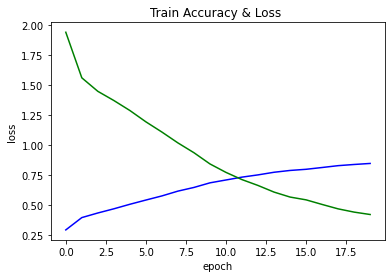

In [ ]:
plt.plot(model_fit.history['accuracy'],color="blue")
plt.plot(model_fit.history['loss'], color = "green")
plt.title('Train Accuracy & Loss ')
plt.ylabel('accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')

In [ ]:
model_evaluate = model.evaluate(test_data)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


221/221 [==============================] - 5s 23ms/step - loss: 2.8227 - accuracy: 0.4880


In [ ]:
import joblib
import pickle
filename = "Emotion detection.joblib"
joblib.dump(model, filename)
print("Saved model to disk")


In [ ]:
import joblib
import pickle
filename = "Emotion detection.joblib"
loaded_model = joblib.load(filename)
loaded_model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 50, 50, 3)        0         
 2D)                                                             
                                                                 
 conv2d_114 (Conv2D)         (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_60 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_115 (Conv2D)         (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_61 (MaxPoolin  (None, 11, 11, 64)       0         
 g2D)                                                            
                                                     

In [ ]:
predictions=loaded_model.predict(test_data)
print(predictions)
predicted_class = np.argmax(predictions, axis=-1)
predictions.shape



*Show as a dataframe, change the numerique columns to classes*

as reminder:

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [ ]:
df = pd.DataFrame(predictions)
df['predicted_class']= predicted_class
df['Class']= [index_to_class(i) for i in predicted_class]
df

,0,1,2,3,4,5,6,predicted_class,Class
0,5.347563e-02,8.004495e-13,3.817587e-03,8.872671e-08,9.415122e-01,1.194584e-03,1.967640e-11,4,neutral
1,5.413943e-03,9.631261e-06,2.465115e-02,3.845565e-03,9.636926e-01,2.387096e-03,4.157372e-08,4,neutral
2,1.251756e-01,1.451709e-05,6.096641e-04,8.239984e-06,3.042927e-01,5.698993e-01,7.528363e-10,5,sad
3,1.570013e-01,1.014494e-03,5.395729e-03,2.221421e-04,1.390853e-01,6.972807e-01,3.940808e-07,5,sad
4,9.998858e-01,9.345019e-13,8.738708e-05,1.050665e-08,7.957100e-11,3.889143e-08,2.677047e-05,0,anger
...,...,...,...,...,...,...,...,...,...
7061,7.793947e-06,3.061403e-10,1.922957e-09,9.999895e-01,2.523367e-06,1.995155e-07,3.152654e-10,3,happy
7062,1.614989e-02,4.582697e-04,1.091177e-03,9.677932e-01,5.171159e-03,9.167549e-03,1.687493e-04,3,happy
7063,1.455987e-01,1.094034e-06,1.322676e-04,5.252460e-01,1.882223e-01,1.407996e-01,1.050959e-08,3,happy
7064,6.723184e-06,2.653809e-14,2.300552e-10,9.999253e-01,6.790680e-05,1.433128e-07,2.025363e-12,3,happy


since we have images with different sizes, we have o adjust the prediction and so the model to any size

Methode1//

In [ ]:
from PIL import Image
foo = Image.open("/content/photo.jpg")
# I downsize the image with an ANTIALIAS filter (gives the highest quality)
foo = foo.resize((48,48),Image.ANTIALIAS)
foo.save("methode1.jpg",optimize= True, quality=92)


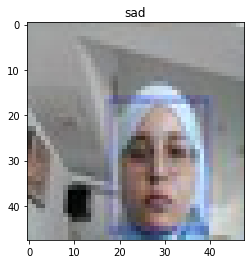

In [ ]:
image = tf.keras.preprocessing.image.load_img('/content/methode1.jpg', target_size=(48, 48))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
input_arr = input_arr.astype('float32') / 255. 
predictions = model.predict(input_arr)
predicted_class = np.argmax(predictions, axis=-1)
plt.title(index_to_class(predicted_class[0]))
plt.imshow(image)

Methode2//

In [ ]:
from PIL import Image
import PIL
import os
import glob

In [ ]:
base_width = 48
image = Image.open('/content/photo.jpg')
width_percent = (base_width / float(image.size[0]))
hsize = int((float(image.size[1]) * float(width_percent)))
image = image.resize((base_width, hsize), PIL.Image.ANTIALIAS)
base_height = 48
hpercent = (base_height / float(image.size[1]))
wsize = int((float(image.size[0]) * float(hpercent)))
image = image.resize((wsize, base_height), PIL.Image.ANTIALIAS)
image.save("methode2.jpg")

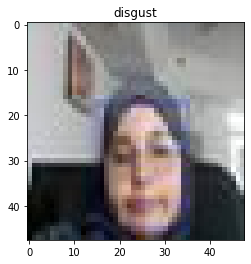

In [ ]:
image = tf.keras.preprocessing.image.load_img('/content/methode2.jpg', target_size=(48, 48))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
input_arr = input_arr.astype('float32')/255 
predictions = model.predict(input_arr)
predicted_class = np.argmax(predictions, axis=-1)
plt.title(index_to_class(predicted_class[0]))
plt.imshow(image)

Methode3

In [ ]:
from PIL import Image
import os
import PIL
import glob
import matplotlib.pyplot as plt


In [ ]:
image = Image.open('/content/photo.jpg')
print(image.size)

resized_image = image.resize((48,48))
print(resized_image.size)

(640, 480)
(48, 48)


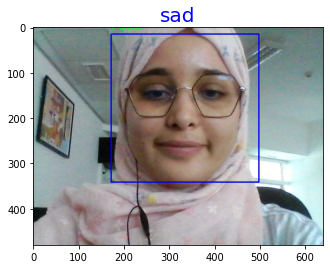

In [ ]:
input_arr = tf.keras.preprocessing.image.img_to_array(resized_image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
input_arr = input_arr.astype('float32')/255 
predictions = loaded_model.predict(input_arr)
predicted_class = np.argmax(predictions, axis=-1)
plt.title(index_to_class(predicted_class[0]),fontsize=20).set_color('Blue')
plt.imshow(image)